<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing</a></span></li></ul></div>

<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>
    


<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Osemekhian Ehilen
</font>
</center>
</p>
</b>

# Overview


- Here we will work on TensorFlow Dataset [stanford_dogs dataset](https://www.tensorflow.org/datasets/catalog/stanford_dogs).


# Notebook Configuration

## Google drive

In [1]:
# IF YOU ARE NOT USING GOOGLE COLAB YOU CAN COMMENT
# OUT THE from google.colab import drive AND drive.mount('/content/drive')
# THEN MAKE YOUR OWN PATH abspath_curr
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')
#"G:\My Drive\Colab Notebooks\code"

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/ML1_Assignment/'

Mounted at /content/drive


## Warning

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [4]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random seed

In [5]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

## Loading Data

In [7]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + 'stanford_dogs')
if not os.path.exists(directory):
    os.makedirs(directory)
#---------------------------------------------------
# Downloading the data to the directory

import tensorflow_datasets as tfds

# Get the name of the data
data_name = 'stanford_dogs'

# load data
data, info= tfds.load(name=data_name, data_dir= abspath_curr + 'stanford_dogs',
                      as_supervised=True,
                      with_info=True)
# name of target variable
target= 'label'

## Getting Info Splits

In [8]:
info.splits

{'test': <tfds.core.SplitInfo num_examples=8580>,
 'train': <tfds.core.SplitInfo num_examples=12000>}

## Classes

In [9]:
classes= info.features[target].names
classes

['n02085620-chihuahua',
 'n02085782-japanese_spaniel',
 'n02085936-maltese_dog',
 'n02086079-pekinese',
 'n02086240-shih-tzu',
 'n02086646-blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-rhodesian_ridgeback',
 'n02088094-afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-walker_hound',
 'n02089973-english_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-irish_wolfhound',
 'n02091032-italian_greyhound',
 'n02091134-whippet',
 'n02091244-ibizan_hound',
 'n02091467-norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-saluki',
 'n02092002-scottish_deerhound',
 'n02092339-weimaraner',
 'n02093256-staffordshire_bullterrier',
 'n02093428-american_staffordshire_terrier',
 'n02093647-bedlington_terrier',
 'n02093754-border_terrier',
 'n02093859-kerry_blue_terrier',
 'n02093991-irish_terrier',
 'n02094114-norfolk_terrier',
 'n02094258-norwi

## Number of Classes

In [10]:
n_classes= info.features[target].num_classes
n_classes

120


## **Getting training and validation and test data**

In [11]:
# Set the training, validation and test split
split_train, split_valid, split_test = 'train[:70%]', 'train[70%:]', 'test'

# Get the training data
data_train = tfds.load(name=data_name,
                       split=split_train,
                       data_dir=abspath_curr + 'stanford_dogs',
                       as_supervised=True)

# Get the validation data
data_valid = tfds.load(name=data_name,
                       split=split_valid,
                       data_dir=abspath_curr + 'stanford_dogs',
                       as_supervised=True)

# Get the test data
data_test = tfds.load(name=data_name,
                      split=split_test,
                      data_dir=abspath_curr + 'stanford_dogs',
                      as_supervised=True)

## **Resizing the Data for Pretrained Model**

In [14]:
# Set the default input size for the pretrained model
global input_size
input_size = [299, 299]

def resize(data, label):
    """
    Resize the data into the default input size of the pretrained model

    Parameters
    ----------
    data: the data
    label: the label
    
    Returns
    ----------
    The resized data and label
    """

    # Resize the data into the default input size of the pretrained model
    data_resized = tf.image.resize(data, input_size)

    return data_resized, label

def preprocess_pretrain(data, label):
    """
    Preprocess the data using pretrained model

    Parameters
    ----------
    data: the data
    label: the label
    
    Returns
    ----------
    The preprocessed data using pretrained model
    """

    # Preprocess the data
    data_preprocessed = preprocess_input(data)

    return data_preprocessed, label

In [15]:
# Resize the training data
data_train = data_train.map(resize)

# Resize the validation data
data_valid = data_valid.map(resize)

# Resize the test data
data_test = data_test.map(resize)

## **Preprocessing the data using pretrained model (Xception)**

In [16]:
# Set the preprocess_input of the pretrained model
global preprocess_input
preprocess_input = tf.keras.applications.xception.preprocess_input  #resnet.preprocess_input

# Preprocess the training data using pretrained model
data_train = data_train.map(preprocess_pretrain)

# Preprocess the validation data using pretrained model
data_valid = data_valid.map(preprocess_pretrain)

# Preprocess the test data using pretrained model
data_test = data_test.map(preprocess_pretrain)

# data, info=preprocess_input(data)

## **Shuffling, batching and prefetching the data**

In [17]:
# Shuffling the training data
data_train = data_train.shuffle(buffer_size=1000, seed=random_seed)

# Set the batch size
batch_size = 16

# Batch and prefetch the training data
data_train = data_train.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
data_valid = data_valid.batch(batch_size).prefetch(1)

# Batch and prefetch the test data
data_test = data_test.batch(batch_size).prefetch(1)

# Training

## Directory for saving model

In [18]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/stanford_dogs/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [19]:
n_classes

120

## **Building the architecture of the model (Xception)**

In [20]:
# Add the pretrained layers
pretrained_model = keras.applications.Xception(include_top=False, weights='imagenet',input_shape=(299, 299, 3))

# Add GlobalAveragePooling2D layer
average_pooling = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)

# Add the output layer
output = keras.layers.Dense(n_classes, activation='softmax')(average_pooling)

# Get the model
model = keras.Model(inputs=pretrained_model.input, outputs=output)

model.summary()

83697664/83683744 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                      

## Freezing the Pre-trianed Layers

In [21]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Freeze the layer
    layer.trainable = False

## Setting Callbacks

**-**Using Performance scheduling to tune the learning rate

**-**Using early stopping to handle overfitting

In [23]:
# ModelCheckpoint callback to_save_the_model
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/stanford_dogs/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback #Performance Scheduling
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=2)

## Compiling the model

In [24]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',    
              metrics=['accuracy'])

## Training the model

In [25]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=6,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/6
525/525 [==============================] - 72s 111ms/step - loss: 0.8758 - accuracy: 0.8174 - val_loss: 0.3329 - val_accuracy: 0.9056 - lr: 0.0010
Epoch 2/6
525/525 [==============================] - 58s 108ms/step - loss: 0.2589 - accuracy: 0.9210 - val_loss: 0.3039 - val_accuracy: 0.9025 - lr: 0.0010
Epoch 3/6
525/525 [==============================] - 57s 107ms/step - loss: 0.1888 - accuracy: 0.9436 - val_loss: 0.2795 - val_accuracy: 0.9064 - lr: 0.0010
Epoch 4/6
525/525 [==============================] - 57s 107ms/step - loss: 0.1476 - accuracy: 0.9549 - val_loss: 0.2780 - val_accuracy: 0.9067 - lr: 0.0010
Epoch 5/6
525/525 [==============================] - 56s 105ms/step - loss: 0.1168 - accuracy: 0.9668 - val_loss: 0.2814 - val_accuracy: 0.9064 - lr: 0.0010
Epoch 6/6
525/525 [==============================] - 56s 105ms/step - loss: 0.0931 - accuracy: 0.9739 - val_loss: 0.2844 - val_accuracy: 0.9047 - lr: 0.0010


## Learning Curve

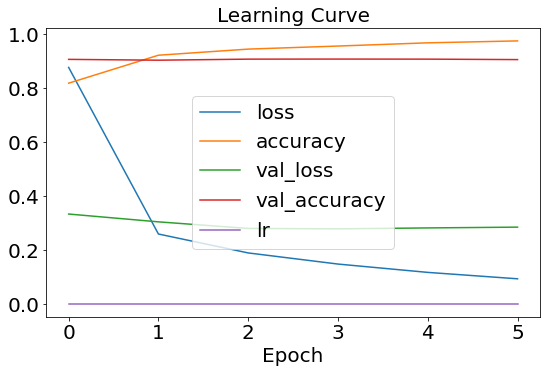

In [26]:
# Make directory
directory = os.path.dirname(abspath_curr + 'result/stanford_dogs/')
if not os.path.exists(directory):
    os.makedirs(directory)

import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Save and show the figure
plt.tight_layout()
plt.legend(loc='center')
plt.title("Learning Curve")
plt.xlabel('Epoch')
plt.savefig(abspath_curr + 'result/stanford_dogs/learning_curve.pdf')
plt.show()

## Unfreezing Pre-trained Layers

In [27]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Unfreeze the layer
    layer.trainable = True

## Compiling the model

In [28]:
# Here we use a lower learning rate (by a factor of 10) of Adam optimizer, 
# so that it is less likely to compromise the pretrained weights.

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Re-training the model

In [29]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=5,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/5
525/525 [==============================] - 219s 405ms/step - loss: 0.2968 - accuracy: 0.8979 - val_loss: 0.4179 - val_accuracy: 0.8658 - lr: 1.0000e-04
Epoch 2/5
525/525 [==============================] - 218s 413ms/step - loss: 0.1053 - accuracy: 0.9690 - val_loss: 0.4650 - val_accuracy: 0.8525 - lr: 1.0000e-04
Epoch 3/5
525/525 [==============================] - 213s 404ms/step - loss: 0.0520 - accuracy: 0.9877 - val_loss: 0.4241 - val_accuracy: 0.8708 - lr: 1.0000e-04


## Second Learning Curve

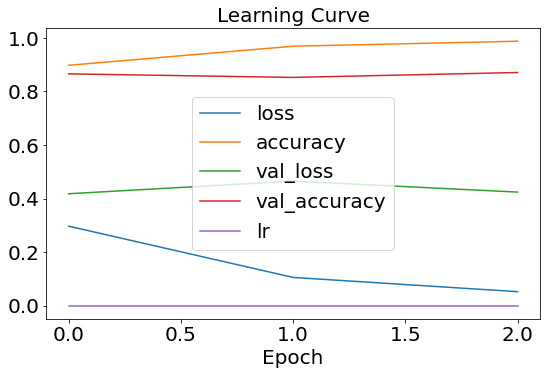

In [30]:
# Make directory
directory = os.path.dirname(abspath_curr + 'result/stanford_dogs/')
if not os.path.exists(directory):
    os.makedirs(directory)

import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Save and show the figure
plt.tight_layout()
plt.legend(loc='center')
plt.title("Learning Curve")
plt.xlabel('Epoch')
plt.savefig(abspath_curr + 'result/stanford_dogs/learning_curve.pdf')
plt.show()

# Testing

In [31]:
# Load the saved model
model.load_weights(filepath=abspath_curr + 'result/stanford_dogs/model.h5')

## Evaluating model

In [32]:
loss, accuracy= model.evaluate(data_test)

537/537 [==============================] - 40s 73ms/step - loss: 0.2873 - accuracy: 0.9078


## Reference



*   The pipeline for this Deep Neural Network is credited to [Yuxiao Huang](https://github.com/yuxiaohuang/teaching/tree/master/gwu/machine_learning_I/spring_2022/code/p3_deep_learning/p3_c2_supervised_learning)

